Package imports for analysis:

In [1]:
import numpy as np
import pandas as pd
import patsy
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import compress

Function to print section titles:

In [2]:
def title_print(text):
    '''
    Used throughout to print section titles
    '''
    print()
    print('#' * (len(text) + 4))
    print('|', text, '|')
    print('#' * (len(text) + 4))

# Problem 1

In [15]:
# Problem setup
SS_reg = 5550.8166
SS_tot = 5784.5426

table = pd.DataFrame({'Source of Variation':
                          ['Regression', 'Residual', 'Total',],
                      'Sum of Squares': [SS_reg, np.nan, SS_tot],
                      'Degrees of Freedom': [np.nan, np.nan, np.nan],
                      'Mean Square': [np.nan, np.nan, ''],
                      'F0': [np.nan, '', ''],
                      'P-value': [np.nan, '', '']})

title_print('Given table')
print(table.to_string())

# Sum of Squares
SS_res = SS_tot - SS_reg

# Degrees of Freedom
DoF_reg = 2
DoF_tot = 25 - 1
DoF_res = DoF_tot - DoF_reg

# Mean Squares
MS_reg = SS_reg / DoF_reg
MS_res = SS_res / DoF_res

# F0
F0 = MS_reg / MS_res

# P-value
P = 1 - scipy.stats.f.cdf(F0, DoF_reg, DoF_res)

table = pd.DataFrame({'Source of Variation':
                          ['Regression', 'Residual', 'Total',],
                      'Sum of Squares': [SS_reg, SS_res, SS_tot],
                      'Degrees of Freedom': [DoF_reg, DoF_res, DoF_tot],
                      'Mean Square': [MS_reg, MS_res, ''],
                      'F0': [F0, '', ''],
                      'P-value': [P, '', '']})

title_print('Solved Table')
print(table.to_string())


###############
| Given table |
###############
  Source of Variation  Sum of Squares  Degrees of Freedom Mean Square   F0 P-value
0          Regression       5550.8166                 NaN         NaN  NaN     NaN
1            Residual             NaN                 NaN         NaN             
2               Total       5784.5426                 NaN                         

################
| Solved Table |
################
  Source of Variation  Sum of Squares  Degrees of Freedom Mean Square       F0      P-value
0          Regression       5550.8166                   2     2775.41  261.242  4.44089e-16
1            Residual        233.7260                  22     10.6239                      
2               Total       5784.5426                  24                                  


> **Based on the small P-value of 4.44089e-16, reject the null hypothesis**

# Problem 2

a. High VIF for *runs* and *runs batted in (RBI)* implies multicollinearity. Can try centering linear terms to reduce VIF.

b. Best model is one that contains first 3 variables (*RBI, contract, KO*). Cp does not improve dramatically (i.e. does not decrease) when adding additional 4th variable. Additionally, R-squared barely improves with addition of 4th variable. In order to keep model simple but accurate, only use *RBI, contract, KO* in model.

# Problem 6


############
| Part 6.1 |
############
B0: -4.7857
B1: 0.1245

Response Function:
(exp(-4.7857 + 0.1245 * x1) / [1 + exp(-4.7857 + 0.1245 * x1)

############
| Part 6.2 |
############


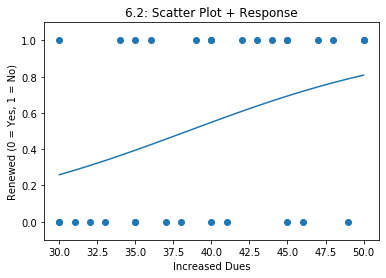


############
| Part 6.3 |
############
exp(b1) = 1.1326
For every $1 increase, 1.1326 increase in odds ratio of non-renewal

############
| Part 6.4 |
############
Prob. of renewal if $40 increase: 0.5487

############
| Part 6.5 |
############
Linear predictor function:
ln(pi / (1 - pi)) = B0 + B1 * x1

If pi = 0.75, x1 = --> $47.2545 <--


In [16]:
df = pd.read_csv('Annual_due.txt',
                 header = None,
                 names = ['y', 'X'],
                 delimiter = '   ',
                 engine = 'python')

# Part 1
title_print('Part 6.1')

X, y = df['X'], df['y']
logreg = LogisticRegression()
logreg.fit(X.values.reshape(-1, 1), y.values)
inter = np.round(logreg.intercept_[0], 4)
coef = np.round(logreg.coef_[0][0], 4)
print('B0: {}'.format(inter))
print('B1: {}'.format(coef))
print('\nResponse Function:')
print('(exp({} + {} * x1) / [1 + exp({} + {} * x1)'.format(*(inter, coef) * 2))

# Part 2
title_print('Part 6.2')
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, logreg.predict_proba(X.values.reshape([-1, 1]))[:, 1])
ax.set_xlabel('Increased Dues')
ax.set_ylabel('Renewed (0 = Yes, 1 = No)')
ax.set_ylim(-0.1, 1.1)
ax.set_title('6.2: Scatter Plot + Response')
plt.show()

# Part 3
title_print('Part 6.3')
print('exp(b1) = {}'.format(round(np.exp(logreg.coef_)[0][0], 4)))
print('For every $1 increase, {} increase in odds ratio of non-renewal'.
      format(round(np.exp(logreg.coef_)[0][0], 4)))

# Part 4
title_print('Part 6.4')
print('Prob. of renewal if $40 increase: {}'.format(
    np.round(logreg.predict_proba([[40]])[0][1], 4)))

# Part 5
title_print('Part 6.5')
pi = 0.75
print('Linear predictor function:')
print('ln(pi / (1 - pi)) = B0 + B1 * x1')
print('\nIf pi = {}, x1 = --> ${} <--'.format(pi,
        np.round((np.log(pi / (1 - pi)) - logreg.intercept_) / logreg.coef_,
        4)[0][0]))

# Problem 7


############
| Part 7.1 |
############
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     39.69
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           2.42e-28
Time:                        17:21:14   Log-Likelihood:                -961.13
No. Observations:                 209   AIC:                             1934.
Df Residuals:                     203   BIC:                             1954.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

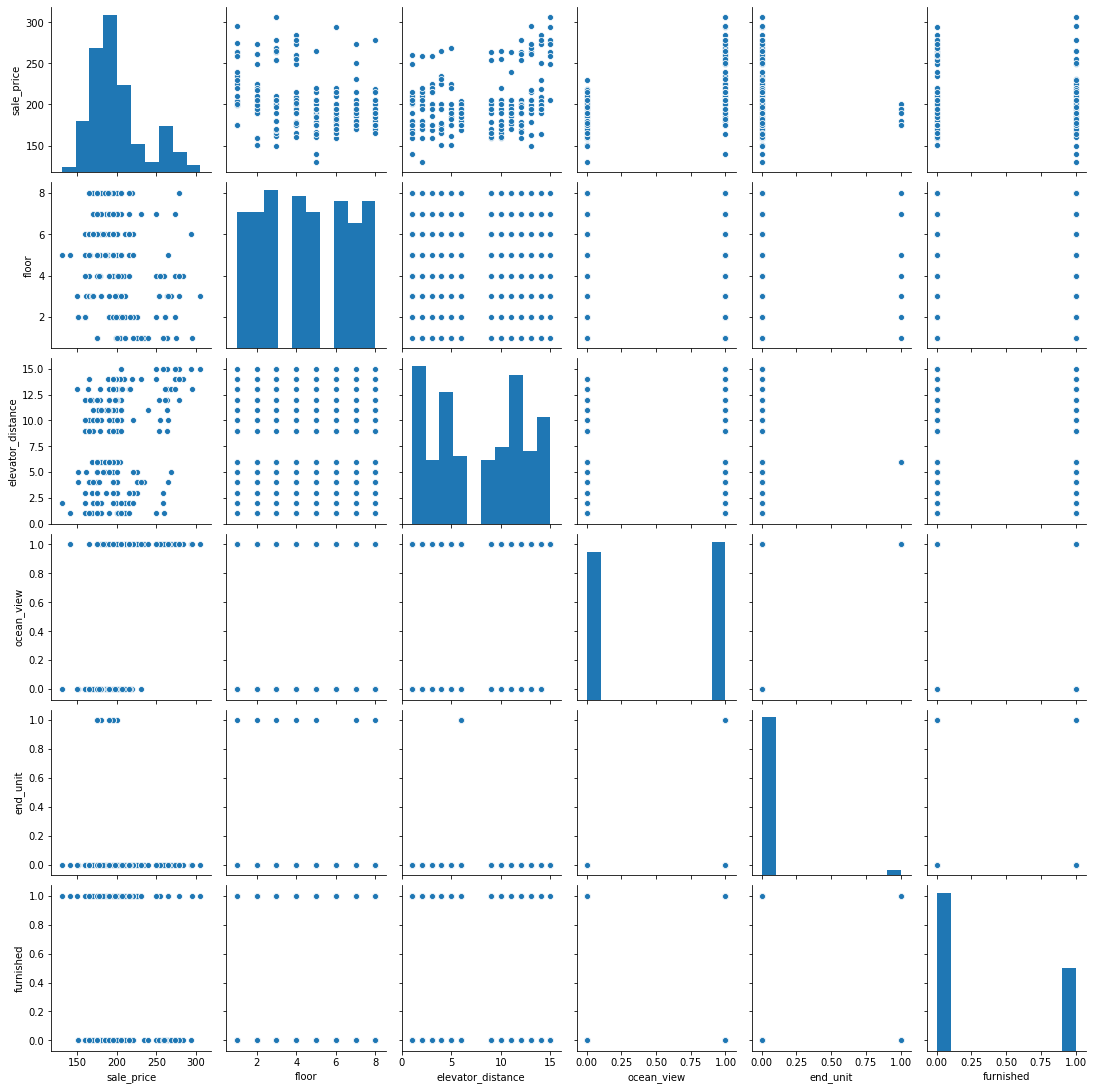

                   sale_price     floor  elevator_distance  ocean_view  end_unit  furnished
sale_price           1.000000 -0.243370           0.312148    0.578867 -0.077880  -0.005262
floor               -0.243370  1.000000          -0.060579    0.030767 -0.016598   0.088126
elevator_distance    0.312148 -0.060579           1.000000    0.094177 -0.073093  -0.146571
ocean_view           0.578867  0.030767           0.094177    1.000000  0.180021  -0.004145
end_unit            -0.077880 -0.016598          -0.073093    0.180021  1.000000   0.032935
furnished           -0.005262  0.088126          -0.146571   -0.004145  0.032935   1.000000


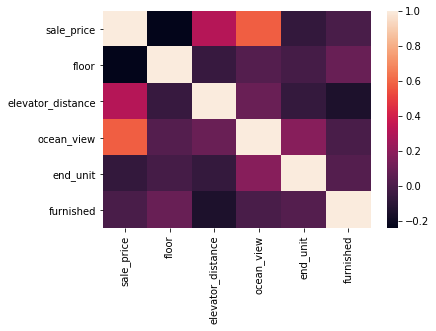


############
| Part 7.3 |
############
R-squared: 0.4943

Relatively low R-squared means model does not fully describe data

############
| Part 7.4 |
############
x0 | p: 0.0
x1 | p: 0.0
x2 | p: 0.0
x3 | p: 0.0
x4 | p: 0.0008
x5 | p: 0.2363

############
| Part 7.5 |
############
VIF_0: 9.5727
VIF_1: 1.0124
VIF_2: 1.0423
VIF_3: 1.0478
VIF_4: 1.0437
VIF_5: 1.0292

High multicollinearity in intercept term

############
| Part 7.6 |
############

-->> Forward Selection <<--
alpha-to-enter: 0.25
t-statistic: 1.1536

Adding: ocean_view
               constant    ocean_view
T_Values   6.568396e+01  1.021367e+01
P_Values  1.367276e-140  4.295006e-20

Adding: elevator_distance
               constant    ocean_view  elevator_distance
T_Values   4.248199e+01  1.024429e+01           4.803274
P_Values  7.093168e-104  3.615651e-20           0.000003

Adding: floor
              constant    ocean_view  elevator_distance     floor
T_Values  3.567185e+01  1.094446e+01           4.736755 -4.789234
P_

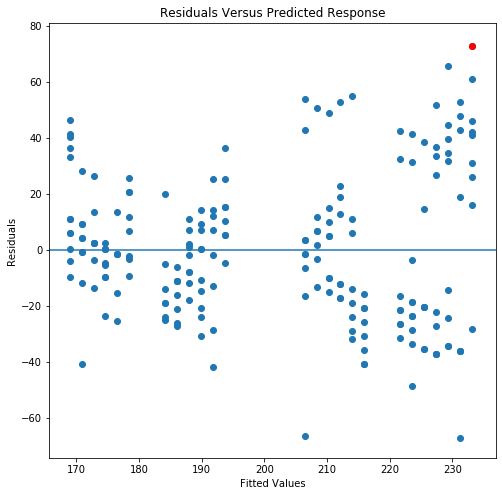

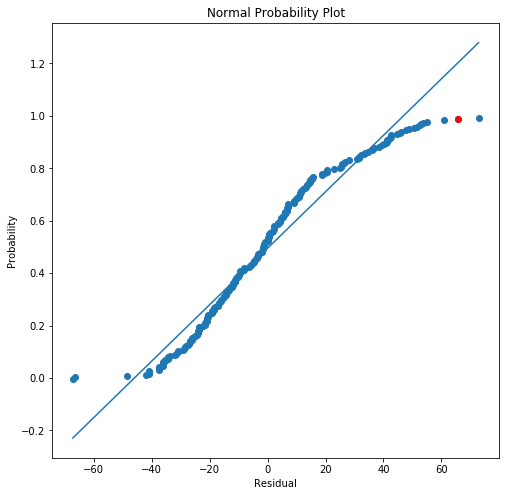


Slight funnel shape in residual plot
and heavy-tailed distribution in normality plot
means assumptions 2 and 4 may be violated.

########
| 7.10 |
########
Can try centering data to eliminate non-constant variance


In [21]:
df = pd.read_csv('condo.txt',
                 header = None,
                 names = ['sale_price', 'floor', 'elevator_distance',
                          'ocean_view', 'end_unit', 'furnished'],
                 delimiter = '\t')

# Part 1
title_print('Part 7.1')
y, X = patsy.dmatrices('sale_price ~ floor + \
                                     elevator_distance + \
                                     ocean_view + \
                                     end_unit + furnished',
                                     df)

model = sm.OLS(y, X)
results = model.fit()
results.model.data.design_info = X.design_info

print(results.summary())
print('\n\n-->> Model: y = {} + {} * x1 + {} * x2 + '\
      '{} * x3 + {} * x4 + {} * x5 <<--'.\
      format(*np.round((results.params[0],
                        results.params[1],
                        results.params[2],
                        results.params[3],
                        results.params[4],
                        results.params[5]),
                       3)))
print('\nAssumptions:')
print('1. Linear response in y')
print('2. Errors have mean zero and constant variance')
print('3. Errors are uncorrelated')
print('4. Errors are normally distributed')

# Part 2
title_print('Part 7.2')
sns.pairplot(df)
plt.show()

print(df.corr().to_string())
sns.heatmap(df.corr())
plt.show()

# Part 3
title_print('Part 7.3')
print('R-squared: {}'.format(round(results.rsquared, 4)))
print('\nRelatively low R-squared means model does not fully describe data')

# Part 4
title_print('Part 7.4')
pvals = np.round(results.pvalues, 4)
[print('x{} | p: {}'.format(i, j)) for i, j in enumerate(pvals)]

# Part 5
title_print('Part 7.5')
vif = np.round([variance_inflation_factor(X, i)
                for i in range(X.shape[1])], 4)
[print('VIF_{}: {}'.format(i, vif[i])) for i, v in enumerate(vif)]
print('\nHigh multicollinearity in intercept term')

# Part 6
title_print('Part 7.6')
corrs = np.abs(df.corr()['sale_price']).sort_values(ascending = False)[1:]

# Forward Selection
print('\n-->> Forward Selection <<--')
alpha_in = 0.25
t_in = round(-scipy.stats.t.ppf(alpha_in/2, len(X) - 2), 4)
print('alpha-to-enter: {}'.format(alpha_in))
print('t-statistic: {}'.format(t_in))

for i, j in enumerate(corrs, 1):
    to_include = list(corrs[:i].index)
    y, X = patsy.dmatrices('sale_price ~ {}'.\
                           format(' + '.join(to_include)), df)

    to_include.insert(0, 'constant')
    model = sm.OLS(y, X)
    results = model.fit()
    results.model.data.design_info = X.design_info
    print('\nAdding: {}'.format(to_include[-1]))
    print(pd.DataFrame(data = {'T_Values': results.tvalues,
                               'P_Values': results.pvalues},
                       index = to_include).T.to_string())

# Backward Elimination
print('\n-->> Backward Elimination <<--')
alpha_out = 0.1
t_out = round(-scipy.stats.t.ppf(alpha_out / 2, len(X) - 2), 4)
print('alpha-to-remove: {}'.format(alpha_out))
print('t-statistic: {}\n'.format(t_out))

to_include = list(corrs.index)

for i, j in enumerate(corrs, 1):
    y, X = patsy.dmatrices('sale_price ~ {}'.\
                           format(' + '.join(to_include)), df)
    
    model = sm.OLS(y, X)
    results = model.fit()
    results.model.data.design_info = X.design_info
    
    df_index = to_include.copy()
    df_index.insert(0, 'constant')
    partial_df = pd.DataFrame(data = {'T_Values': results.tvalues,
                                      'P_Values': results.pvalues},
                              index = df_index)
    print(partial_df.T.to_string())
    min_t_idx = partial_df['T_Values'].argmin()
    min_t_val = partial_df['T_Values'].iloc[min_t_idx]
    min_t_var = partial_df.index[min_t_idx]
    
    if min_t_val < t_out:
        print('Removing: {}\n'.format(min_t_var))
        to_include.remove(min_t_var)
    else:
        break

# Reduced Model
print('-->> Reduced Model <<--')
red_coef = np.round(results.params)
print('y = {} + {} * ocean_view + {} * elevator_distance'.format(
      red_coef[0], red_coef[1], red_coef[2]))

# Part 7
title_print('Part 7.7')
vif = np.round([variance_inflation_factor(X, i)
                for i in range(X.shape[1])], 4)
[print('VIF_{}: {}'.format(i, vif[i])) for i, v in enumerate(vif)]
print('\nSignificantly less multicollinearity. Intercept term <5.')

# Part 8
title_print('Part 7.8')
infl = results.get_influence()
infl_df = infl.summary_frame()
print(infl_df.head())
print('...continued...')
infl_pts = {}

# Leverage Points - Hat Diagonal
n, p = X.shape[0], X.shape[1] - 1
lev_pt = 2 * p / n
dhat_pts = list(infl_df[infl_df['hat_diag'] > lev_pt].index)
print('\n***| Hat Diagonal |***')
print('Leverage cutoff (2 * p \ n) = {}'.format(round(lev_pt, 3)))
print('Points where hat diagonal exceeds leverage cutoff: {}'.
    format(dhat_pts))

# Cook's D
cook_pts = list(infl_df[infl_df['cooks_d'] > 1].index)
print('\n***| Cook\'s D |***')
print('Points where Cook\'s D is > 1: {}'.
  format(cook_pts))

# DFFITS
DFFITS_cutoff = 2 * np.sqrt(p / n)
DFFITS_pts = list(infl_df[infl_df['dffits'] > DFFITS_cutoff].index)
print('\n***| DFFITS |***')
print('DFFITS cutoff (2 * sqrt(p / n)) = {}'.
      format(round(DFFITS_cutoff, 3)))
print('Points which exceed DFFITS cutoff: {}'.
      format(DFFITS_pts))

# DFBETAS
print('\n***| DFBETAS |***')
DFBETAS_cutoff = 2 / np.sqrt(n)
DFBETAS_pts = []
print('DFBETAS cutoff (2 / sqrt(n)) = {}'.
      format(round(DFBETAS_cutoff, 3)))
for col in infl_df.columns:
    if 'dfb' in col:
        temp_dfbeta = list(infl_df[infl_df[col] > DFBETAS_cutoff].index)
        DFBETAS_pts.extend(temp_dfbeta)        
        print('Points which exceed DFBETAS cutoff for {}: {}'.
              format(col,
                     list(temp_dfbeta)))

# COVRATIO
print('\n***| COVRATIO |***')
COVRATIO_cutoff_pos = 1 + 3 * p / n
COVRATIO_cutoff_neg = 1 - 3 * p / n
gt_cutoff = list(compress(range(len(infl.cov_ratio)),
                          infl.cov_ratio > COVRATIO_cutoff_pos))
lt_cutoff = list(compress(range(len(infl.cov_ratio)),
                          infl.cov_ratio < COVRATIO_cutoff_neg))
COVRATIO_pts = gt_cutoff + lt_cutoff
print('Upper COVRATIO cutoff (1 + 3 * p / n) = {}'.
      format(np.round(COVRATIO_cutoff_pos, 3)))
print('Lower COVRATIO cutoff (1 - 3 * p / n) = {}'.
      format(np.round(COVRATIO_cutoff_neg, 3)))
print('Points which are greater than COVRATIO upper bound cutoff:\n{}'.
      format(gt_cutoff))
print('Points which are less than COVRATIO lower bound cutoff:\n{}'.
      format(lt_cutoff))

# Most influential points
for i in dhat_pts + cook_pts + DFFITS_pts + DFBETAS_pts + COVRATIO_pts:
    infl_pts[i] = infl_pts.get(i, 0) + 1
most_infl = [pt for pt in infl_pts
             if infl_pts[pt] == max(infl_pts.values())]
print('\n***| MOST INFLUENTIAL POINTS |***') #points in every cutoff
print(sorted(most_infl))

# Check most influential point(s)
print()
for i in most_infl:
    print(df.iloc[i])

# Part 9
title_print('Part 7.9')
resid = results.resid
Prob = [(i - 1/2) / len(y) for i in range(len(y))]

# Plot residuals vs. fitted values
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(results.fittedvalues, resid)
ax.scatter(results.fittedvalues[207], resid[207], c = 'red')
ax.axhline(0)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
plt.title('Residuals Versus Predicted Response')
plt.show()

# Calculate OLS from resid to plot straight line. y values from model
resid_results = sm.OLS(Prob, sm.add_constant(sorted(resid))).fit()
X_range = np.linspace(min(resid),
                      max(resid),
                      len(resid))

# Normality plot
fig = plt.figure(figsize = (8, 8))
plt.scatter(sorted(resid), Prob)
plt.scatter(sorted(resid)[207], Prob[207], c = 'red')
plt.plot(X_range,
         resid_results.params[0] + resid_results.params[1] * X_range)
plt.xlabel('Residual')
plt.ylabel('Probability')
plt.title('Normal Probability Plot')
plt.show()

print('\nSlight funnel shape in residual plot')
print('and heavy-tailed distribution in normality plot')
print('means assumptions 2 and 4 may be violated.')

# Part 10
title_print('7.10')
print('Can try centering data to eliminate non-constant variance')